# Written by Claude 2.5

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data and split into train/test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class names 
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Normalize pixel values and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

In [3]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train model
model.compile(optimizer='adam',
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

2023-09-04 20:41:59.103680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-04 20:41:59.115906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-04 20:41:59.116727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-04 20:41:59.118011: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10


2023-09-04 20:42:01.664482: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-09-04 20:42:03.205098: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 10s 5ms/step - loss: 1.5341 - accuracy: 0.4372 - val_loss: 1.2339 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1562 - accuracy: 0.5901 - val_loss: 1.0937 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0197 - accuracy: 0.6402 - val_loss: 0.9983 - val_accuracy: 0.6420
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9256 - accuracy: 0.6732 - val_loss: 0.9683 - val_accuracy: 0.6624
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8621 - accuracy: 0.6955 - val_loss: 0.8921 - val_accuracy: 0.6864
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8103 - accuracy: 0.7155 - val_loss: 0.8639 - val_accuracy: 0.6980
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7645 - accuracy: 0.7327 - val_loss: 0.8763 - val_accuracy: 0.6968
Ep

In [4]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8863 - accuracy: 0.7023
Test accuracy: 0.7023000121116638


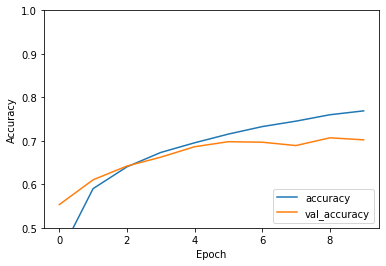

In [5]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [6]:
# Make predictions and generate confusion matrix
test_preds = model.predict(x_test)
test_preds = np.argmax(test_preds, axis=1)
cm = confusion_matrix(y_test, test_preds)

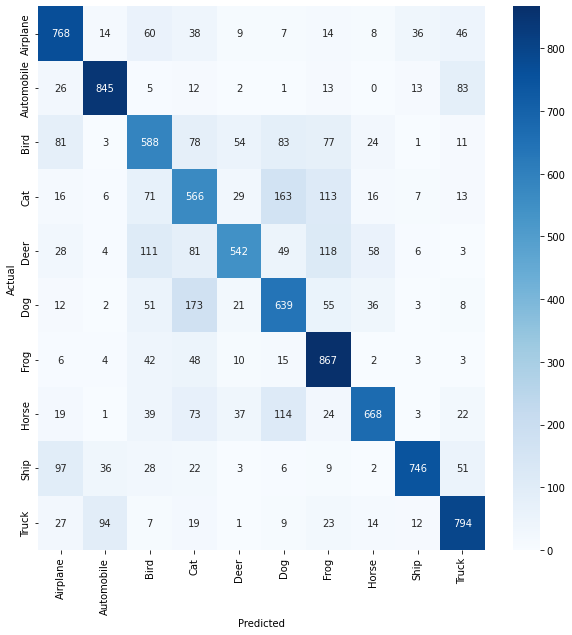

In [7]:
# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

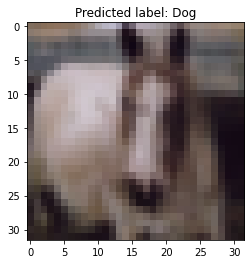

Done!


In [8]:
# Display random sample prediction
i = np.random.choice(len(test_preds))
plt.imshow(x_test[i])
plt.title("Predicted label: " + class_names[test_preds[i]]) 
plt.show()

print("Done!")